In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn
sklearn.set_config(print_changed_only=True)

## Automatic Feature Selection
### Univariate statistics

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 10% of features:
select = SelectPercentile(percentile=10)
select.fit(X_train, y_train)

# transform training set:
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 8)


In [4]:
from sklearn.feature_selection import f_classif, f_regression, chi2

In [5]:
F, p = f_classif(X_train, y_train)

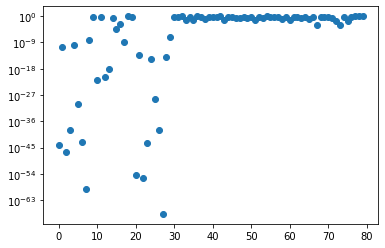

In [7]:
plt.figure()
plt.semilogy(p, 'o');

[ True False  True False False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


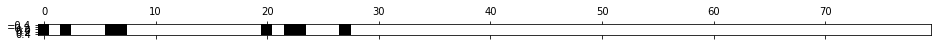

In [9]:
mask = select.get_support()
print(mask)

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r');

In [12]:
from sklearn.linear_model import LogisticRegression

# transform test data:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: %f" % lr.score(X_test_selected, y_test))

Score with all features: 0.929825
Score with only selected features: 0.947368


C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model-based Feature Selection

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# select transform is a meta-transformer for 
# selecting features based on importance weights.
select = SelectFromModel(RandomForestClassifier(random_state=42),
                         threshold="median")

In [14]:
select.fit(X_train, y_train)
X_train_rf = select.transform(X_train)

print(X_train.shape)
print(X_train_rf.shape)

(284, 80)
(284, 40)


C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


`SelectFromModel` selected 50% of the original features

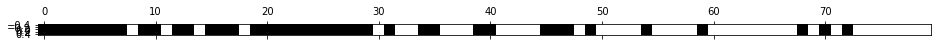

In [16]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r');

In [17]:
X_test_rf = select.transform(X_test)
LogisticRegression().fit(X_train_rf, y_train).score(X_test_rf, y_test)

C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9543859649122807

### Recursive Feature Elimination

sklearn's RFE definition:

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

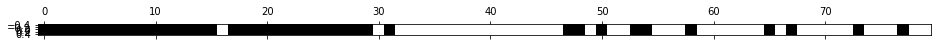

In [19]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(random_state=42, n_estimators=100),
             n_features_to_select=40)

select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [20]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9508771929824561

In [21]:
select.score(X_test, y_test)

0.9508771929824561

### Sequential Feature Selection

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression(), k_features=40, 
                                forward=False, scoring='accuracy')

sfs = sfs.fit(X_train, y_train)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
mask = np.zeros(80, dtype='bool')
mask[np.array(sfs.k_feature_idx_)] = True

In [ ]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [ ]:
LogisticRegression().fit(sfs.transform(X_train), y_train).score(
    sfs.transform(X_test), y_test)

# Exercises
Choose either the Boston housing dataset or the adult dataset from above. Compare a linear model with interaction features (with PolynomialFeatures) against one without interaction features.
Use feature selection to determine which interaction features were most important.

In [ ]:
# %load solutions/feature_importance.py